In [44]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [45]:
rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

## Load dataset

In [46]:
data_dir = Path('C:\DACON\/titanic\dataset')
build_dir = Path('C:\DACON\/titanic\/build')
feature_dir = Path('C:\DACON\/titanic\/build\/feature')

class_file = feature_dir / 'class.csv'
one_hot_file = feature_dir / 'one_hot.csv'
sample_file = data_dir / 'submission.csv'

seed = 23

In [47]:
## Change THESE
algo_name = 'rf'   
feature_name = 'class'
model_name = f'{algo_name}_{feature_name}'

sub_file = build_dir / f'{model_name}.csv'
print(sub_file)

C:\DACON\titanic\build\rf_class.csv


df = train 891 rows + test 418 rows(with no 'Survived' value)

In [48]:
class_df = pd.read_csv(class_file, index_col=0)
one_hot_df = pd.read_csv(one_hot_file, index_col=0)

print(class_df.shape, one_hot_df.shape)

ntrn = 891
ntst = 418
target_col = 'Survived'

class_df.head()

(1309, 8) (1309, 30)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
PassengerId,,,,,,,,
1,0.0,3,0,2,1,0,1,1
2,1.0,1,1,3,3,2,3,1
3,1.0,3,1,2,1,0,2,0
4,1.0,1,1,3,3,0,3,1
5,0.0,3,0,3,1,0,1,0


## Split dataset

In [49]:
# Change THESE!
df = class_df # one_hot_df
# sub_file = class_sub_file # one_hot_sub_file 

y = df[target_col][:ntrn]
df.drop(target_col, axis=1, inplace=True)
features = df.columns.to_list()

trn = df[features][:ntrn]
tst = df[features][ntrn:]
print(y.shape, df.shape)

(891,) (1309, 7)


In [50]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.5, random_state=seed) ## trn : val = 1 : 1
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(445, 7) (446, 7) (445,) (446,)


## Predict

In [86]:
n_models = 4 # 5
p_val = np.zeros((X_val.shape[0], n_models))
p_tst = np.zeros((tst.shape[0], n_models))

### Logistic Regression >> i = 0

In [52]:
from sklearn.linear_model import LogisticRegression

algo_name = 'stk'
feature_name = 'class'
model_name = f'{algo_name}_{feature_name}'

sub_file = build_dir / f'{model_name}.csv'
print(sub_file)

C:\DACON\titanic\build\stk_class.csv


In [53]:
logreg = LogisticRegression()
logreg.fit(X_trn, y_trn)
        # eval_set=[(X_val, y_val)],
        # eval_metric = 'accuracy_score', 
        # early_stopping_rounds=10)
y_pred = logreg.predict(X_val)
y_tst = logreg.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

p_val[:, 0] = y_pred
p_tst[:, 0] = y_tst

              precision    recall  f1-score   support

  Survived 0       0.83      0.83      0.83       279
  Survived 1       0.72      0.72      0.72       167

    accuracy                           0.79       446
   macro avg       0.78      0.78      0.78       446
weighted avg       0.79      0.79      0.79       446



<AxesSubplot:ylabel='feature'>

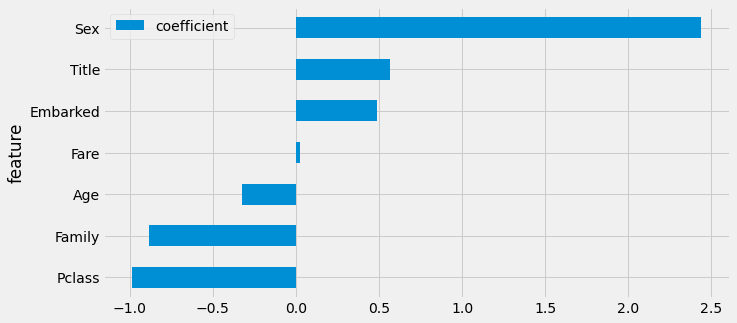

In [54]:
coeff = pd.DataFrame({'feature': trn.columns, 'coefficient': logreg.coef_[0]})
coeff = coeff.sort_values('coefficient').set_index('feature')
coeff.plot(kind='barh')

### Support Vector Machine (SVM) >> i = 1

In [55]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_trn, y_trn)
y_pred = svc.predict(X_val)
y_tst = svc.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

p_val[:, 1] = y_pred
p_tst[:, 1] = y_tst

              precision    recall  f1-score   support

  Survived 0       0.83      0.86      0.85       279
  Survived 1       0.76      0.71      0.73       167

    accuracy                           0.81       446
   macro avg       0.80      0.79      0.79       446
weighted avg       0.81      0.81      0.81       446



### K-Nearest Neighbors(K-NN) >> i = 2

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_trn, y_trn)
y_pred = knn.predict(X_val)
y_tst = knn.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

p_val[:, 2] = y_pred
p_tst[:, 2] = y_tst

              precision    recall  f1-score   support

  Survived 0       0.83      0.85      0.84       279
  Survived 1       0.74      0.71      0.72       167

    accuracy                           0.80       446
   macro avg       0.79      0.78      0.78       446
weighted avg       0.80      0.80      0.80       446



### Decision Tree >> i = 3

In [57]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_trn, y_trn)
y_pred = decision_tree.predict(X_val)
y_tst = decision_tree.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

p_val[:, 3] = y_pred
p_tst[:, 3] = y_tst

              precision    recall  f1-score   support

  Survived 0       0.84      0.82      0.83       279
  Survived 1       0.71      0.73      0.72       167

    accuracy                           0.79       446
   macro avg       0.77      0.78      0.78       446
weighted avg       0.79      0.79      0.79       446



### Random Forest >> i = 4
- Highest accuracy with the validation dataset
- Strong learner라서 stacking에는 제외

In [58]:
# from sklearn.ensemble import RandomForestClassifier

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_trn, y_trn)
# y_pred = random_forest.predict(X_val)
# y_tst = random_forest.predict(tst)

# print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

# p_val[:, 4] = y_pred
# p_tst[:, 4] = y_tst

              precision    recall  f1-score   support

  Survived 0       0.86      0.84      0.85       279
  Survived 1       0.74      0.77      0.75       167

    accuracy                           0.81       446
   macro avg       0.80      0.80      0.80       446
weighted avg       0.81      0.81      0.81       446



## Stacking 

In [59]:
print(p_val.shape, p_tst.shape)

(446, 5) (418, 5)


In [60]:
# pX_trn, pX_val, py_trn, py_val = train_test_split(p_val, y_val, test_size=.2, random_state=seed)
# print(pX_trn.shape, pX_val.shape, py_trn.shape, py_val.shape)

(356, 5) (90, 5) (356,) (90,)


In [80]:
# import lightgbm as lgb

# clf = lgb.LGBMClassifier(n_estimators=80,
#                          num_leaves=15,
#                          learning_rate=0.2,
#                          min_child_samples=5,
#                          subsample=.5,
#                          subsample_freq=1,
#                          colsample_bytree=.8,
#                          random_state=seed,
#                          n_jobs=-1)

                         
# clf.fit(pX_trn, py_trn,
#         eval_set=[(pX_val, py_val)],
#         eval_metric = 'accuracy_score', #'log_loss',
#         early_stopping_rounds=20)
# pp_val = clf.predict(pX_val)
# pp_tst = clf.predict(p_tst)

# print(classification_report(py_val, pp_val, target_names=['Survived 0', 'Survived 1']))

[1]	valid_0's binary_logloss: 0.619977
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.580902
[3]	valid_0's binary_logloss: 0.546938
[4]	valid_0's binary_logloss: 0.52801
[5]	valid_0's binary_logloss: 0.520877
[6]	valid_0's binary_logloss: 0.512321
[7]	valid_0's binary_logloss: 0.507078
[8]	valid_0's binary_logloss: 0.506521
[9]	valid_0's binary_logloss: 0.506736
[10]	valid_0's binary_logloss: 0.507917
[11]	valid_0's binary_logloss: 0.506388
[12]	valid_0's binary_logloss: 0.504485
[13]	valid_0's binary_logloss: 0.507467
[14]	valid_0's binary_logloss: 0.509093
[15]	valid_0's binary_logloss: 0.509935
[16]	valid_0's binary_logloss: 0.509583
[17]	valid_0's binary_logloss: 0.50793
[18]	valid_0's binary_logloss: 0.505191
[19]	valid_0's binary_logloss: 0.50203
[20]	valid_0's binary_logloss: 0.503344
[21]	valid_0's binary_logloss: 0.498785
[22]	valid_0's binary_logloss: 0.495909
[23]	valid_0's binary_logloss: 0.493284
[24]	valid_0's binary_logloss: 

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_trn, y_trn)
y_pred = decision_tree.predict(X_val)
y_tst = decision_tree.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

p_val[:, 3] = y_pred
p_tst[:, 3] = y_tst

In [81]:
print(pp_val[:10])

[0. 0. 1. 1. 1. 0. 1. 1. 0. 0.]


In [82]:
print('accuracy_score:', f'{accuracy_score(py_val, pp_val):.4f}')

accuracy_score: 0.8000


<AxesSubplot:ylabel='model'>

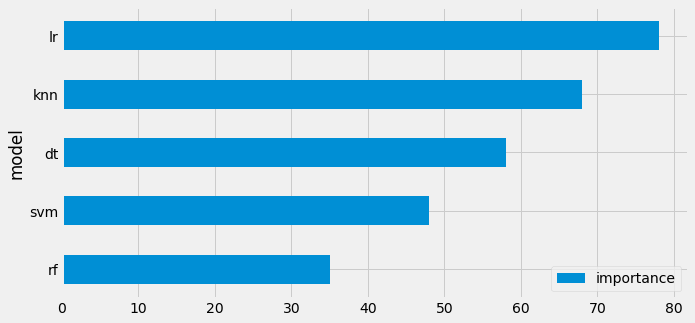

In [83]:
# plt.rcParams.update({'font.size': 10})
imp = pd.DataFrame({'model': ['lr', 'svm', 'knn', 'dt', 'rf'], 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('model')
imp.plot(kind='barh')

## Save as .csv

In [84]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [85]:
sub[target_col] = y_tst
sub.to_csv(sub_file)